In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [4]:
df = pd.read_csv('medical_examination.csv')

In [5]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Add `overweight` column

In [6]:
df['overweight'] = round(df['weight'] / (df['height'] * df['height']), 1)

Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [7]:
df['overweight'] = df['overweight'].apply(lambda x : 1 if x > 25 else 0)
df['gluc'] = df['gluc'].apply(lambda x : 0 if x == 1 else 1)
df['cholesterol'] = df['cholesterol'].apply(lambda x : 0 if x == 1 else 1)

### Draw `Categorical Plot`

Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

In [14]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

In [15]:
df_cat['total'] =   1
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()

In [16]:
df_cat.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


Draw the catplot with 'sns.catplot()'

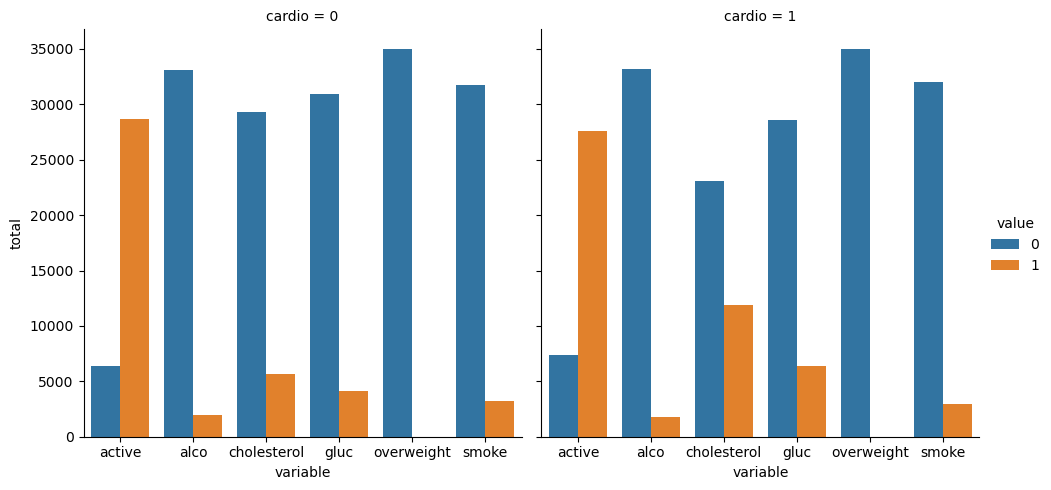

In [17]:
sns.catplot(x = 'variable', y = 'total', data = df_cat, hue = 'value', kind = 'bar', col = 'cardio')

### Draw `Heat Map`

Clean the data

In [18]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

Calculate the correlation matrix

In [19]:
corr = df_heat.corr(method = 'pearson')

Generate a mask for the upper triangle

In [20]:
mask = np.triu(corr)

Set up the matplotlib figure

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))

Draw the heatmap with 'sns.heatmap()'

/usr/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

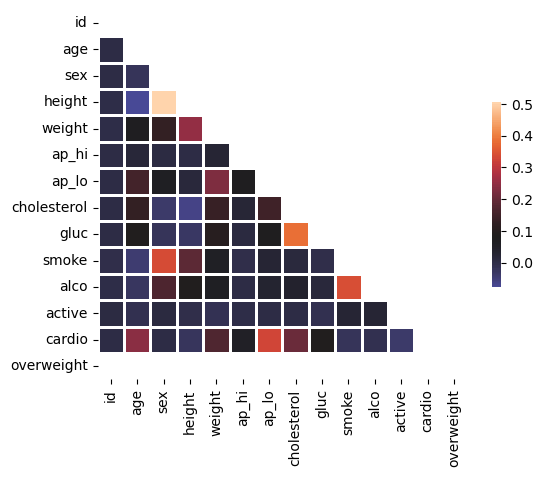

In [23]:
sns.heatmap(corr, linewidth = 1, annot = True, square = True, mask = mask, fmt =".1f", center = 0.08, cbar_kws = {"shrink":0.5})